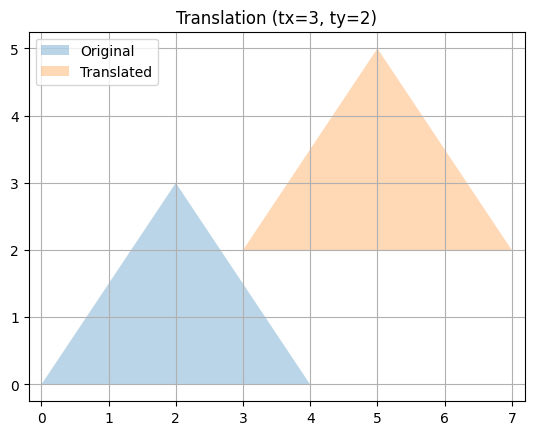

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def translate(vertices, tx, ty):#The translate() function applies translation to the input vertices:
    T = np.array([[1, 0, tx], #tx and ty: The translation distances along the x and y axes, respectively.
                  [0, 1, ty],
                  [0, 0, 1]])#homogeneous matrix
    homogeneous_vertices = np.hstack((vertices, np.ones((len(vertices), 1)))) #np.hstack(...) horizontally stacks.............Converts each (x, y) coordinate into homogeneous coordinates (x, y, 1).
# Each row now has an extra 1, which allows us to apply matrix multiplication.
    transformed_vertices = homogeneous_vertices @ T.T #transpose of translation matrix
    return transformed_vertices[:, :2]

# Original vertices
vertices = np.array([[0, 0], [4, 0], [2, 3]])

# Translation
translated_vertices = translate(vertices, 3, 2)

# Plot
plt.figure()
plt.fill(*zip(*vertices), alpha=0.3, label="Original") #extracts x and y coordinates separately.. alpha=0.3,Makes it semi-transparent.
plt.fill(*zip(*translated_vertices), alpha=0.3, label="Translated")
plt.legend()
plt.title("Translation (tx=3, ty=2)")
plt.grid()
plt.axis("equal")
plt.show()


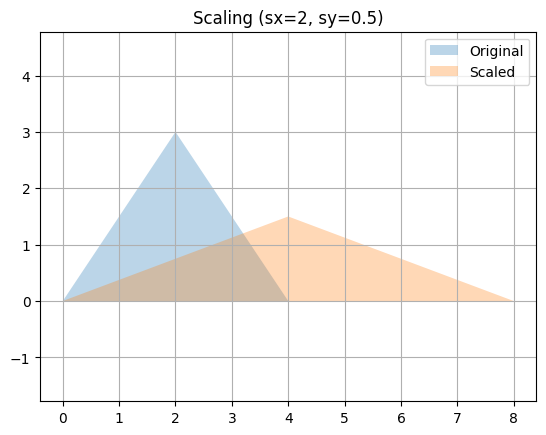

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def scale(vertices, sx, sy):
    S = np.array([[sx, 0, 0],
                  [0, sy, 0],
                  [0, 0, 1]])
    homogeneous_vertices = np.hstack((vertices, np.ones((len(vertices), 1))))  # Add homogeneous coordinate
    transformed_vertices = homogeneous_vertices @ S.T  # Matrix multiplication with scaling matrix
    return transformed_vertices[:, :2]  # Extract x and y coordinates

# Original vertices
vertices = np.array([[0, 0], [4, 0], [2, 3]])

# Apply scaling
scaled_vertices = scale(vertices, 2, 0.5)

# Plot the result
plt.figure()
plt.fill(*zip(*vertices), alpha=0.3, label="Original")
plt.fill(*zip(*scaled_vertices), alpha=0.3, label="Scaled")
plt.legend()
plt.title("Scaling (sx=2, sy=0.5)")
plt.grid()
plt.axis("equal")
plt.show()
# “If sx,sy\>1sx, sy > 1sx,sy\>1, the object **expands**.”
# “* 0<sx,sy<1, the object **shrinks**.” “If sxsxsx or sysysy is negative, the object **flips** across that axis.”

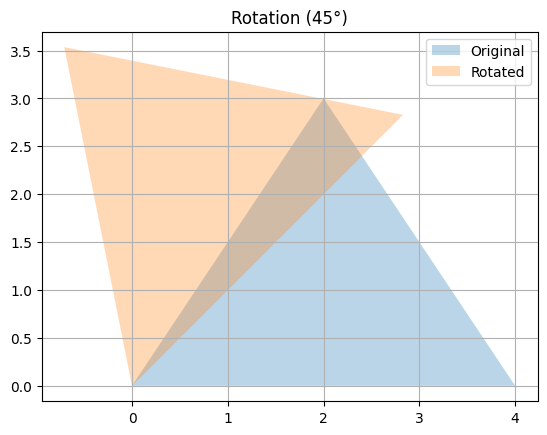

In [ ]:
def rotate(vertices, angle):
    angle_rad = np.radians(angle)
    R = np.array([[np.cos(angle_rad), -np.sin(angle_rad), 0],
                  [np.sin(angle_rad), np.cos(angle_rad), 0],
                  [0, 0, 1]])
    homogeneous_vertices = np.hstack((vertices, np.ones((len(vertices), 1))))
    transformed_vertices = homogeneous_vertices @ R.T
    return transformed_vertices[:, :2]

# Rotation
rotated_vertices = rotate(vertices, 45)

# Plot
plt.figure()
plt.fill(*zip(*vertices), alpha=0.3, label="Original")
plt.fill(*zip(*rotated_vertices), alpha=0.3, label="Rotated")
plt.legend()
plt.title("Rotation (45°)")
plt.grid()
plt.axis("equal")
plt.show()


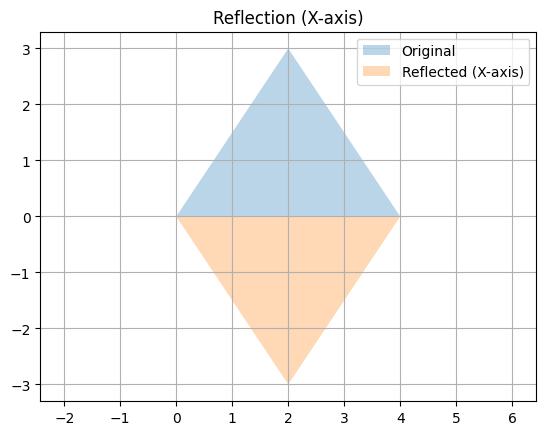

In [ ]:
def reflect(vertices, axis):
    if axis == 'x':
        R = np.array([[1, 0, 0],
                      [0, -1, 0],
                      [0, 0, 1]])
    elif axis == 'y':
        R = np.array([[-1, 0, 0],
                      [0, 1, 0],
                      [0, 0, 1]])
    elif axis == 'origin':
        R = np.array([[-1, 0, 0],
                      [0, -1, 0],
                      [0, 0, 1]])
    homogeneous_vertices = np.hstack((vertices, np.ones((len(vertices), 1))))
    transformed_vertices = homogeneous_vertices @ R.T
    return transformed_vertices[:, :2]

# Reflection
reflected_vertices = reflect(vertices, axis='x')

# Plot
plt.figure()
plt.fill(*zip(*vertices), alpha=0.3, label="Original")
plt.fill(*zip(*reflected_vertices), alpha=0.3, label="Reflected (X-axis)")
plt.legend()
plt.title("Reflection (X-axis)")
plt.grid()
plt.axis("equal")
plt.show()


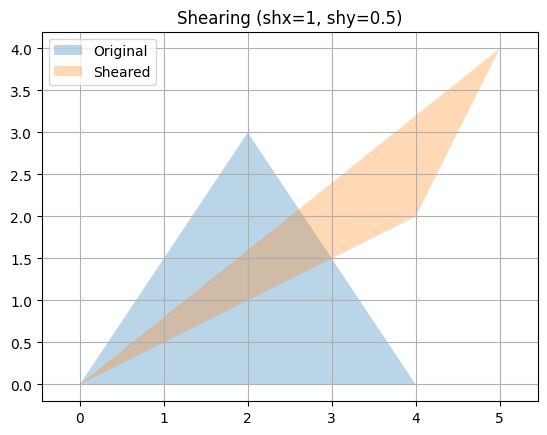

In [ ]:
def shear(vertices, shx, shy):
    Sh = np.array([[1, shx, 0],
                   [shy, 1, 0],
                   [0, 0, 1]])
    homogeneous_vertices = np.hstack((vertices, np.ones((len(vertices), 1))))
    transformed_vertices = homogeneous_vertices @ Sh.T
    return transformed_vertices[:, :2]

# Shearing
sheared_vertices = shear(vertices, 1, 0.5)

# Plot
plt.figure()
plt.fill(*zip(*vertices), alpha=0.3, label="Original")
plt.fill(*zip(*sheared_vertices), alpha=0.3, label="Sheared")
plt.legend()
plt.title("Shearing (shx=1, shy=0.5)")#slanting effect
plt.grid()
plt.axis("equal")
plt.show()


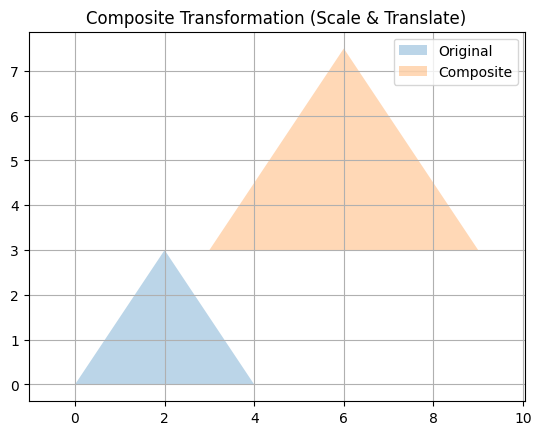

In [ ]:
def composite_transform(vertices):
    # Composite transformation: Scale -> Translate
    S = np.array([[1.5, 0, 0],
                  [0, 1.5, 0],
                  [0, 0, 1]])
    T = np.array([[1, 0, 2],
                  [0, 1, 2],
                  [0, 0, 1]])
    composite = S @ T
    homogeneous_vertices = np.hstack((vertices, np.ones((len(vertices), 1))))
    transformed_vertices = homogeneous_vertices @ composite.T
    return transformed_vertices[:, :2]

composite_vertices = composite_transform(vertices)

# Plot
plt.figure()
plt.fill(*zip(*vertices), alpha=0.3, label="Original")
plt.fill(*zip(*composite_vertices), alpha=0.3, label="Composite")
plt.legend()
plt.title("Composite Transformation (Scale & Translate)")
plt.grid()
plt.axis("equal")
plt.show()


**TASK:2**

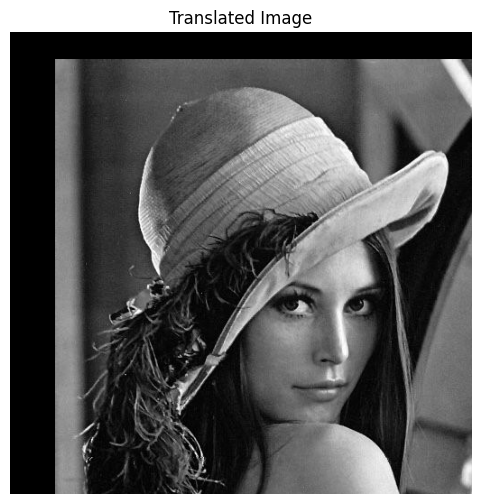

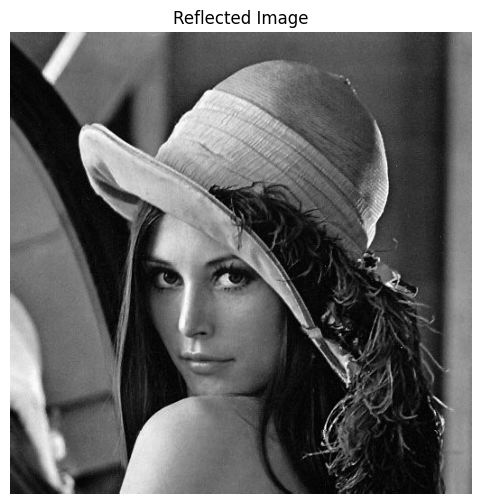

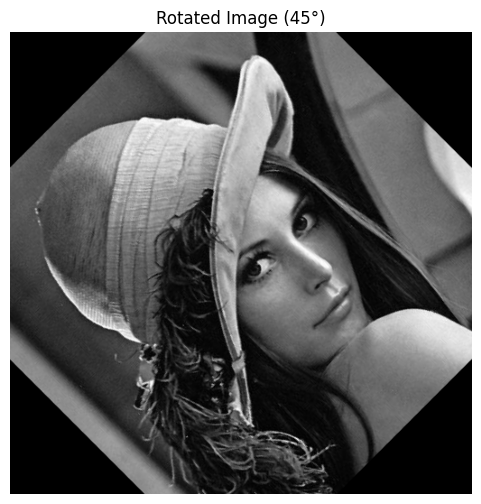

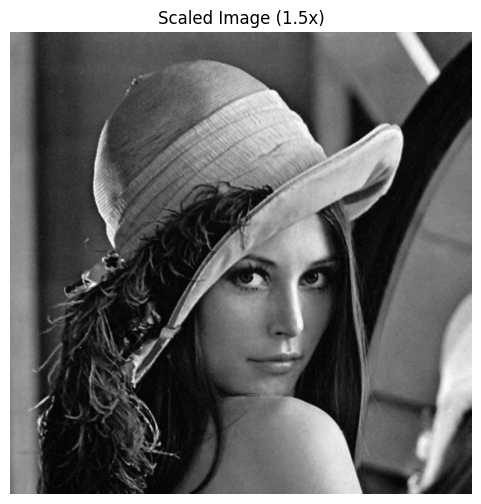

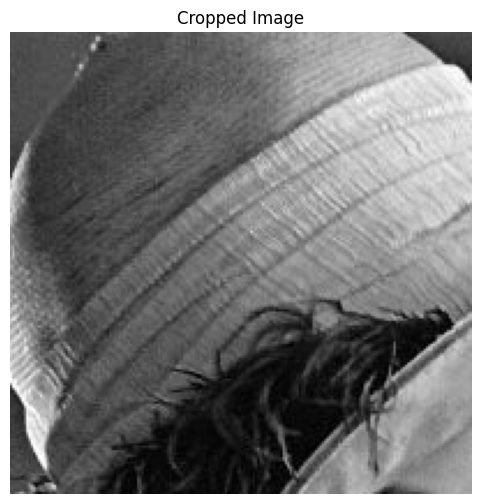

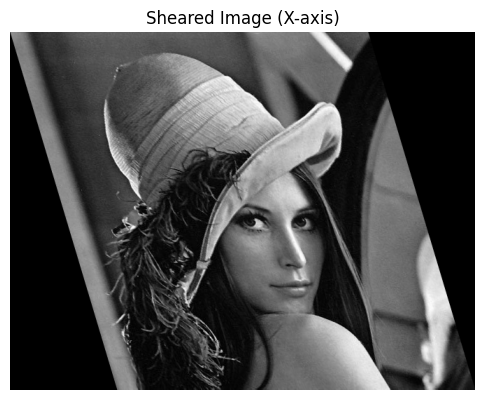

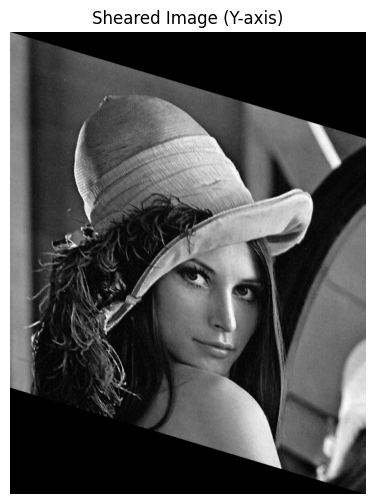

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/opencv_transform.jpg')  # Read the uploaded image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display

# Function to display images
def show_image(title, img):
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.show()

# 1. Translation (Shifting)
def translate(img, tx, ty):
    rows, cols = img.shape[:2]
    T = np.float32([[1, 0, tx], [0, 1, ty]])  # Translation matrix
    translated_img = cv2.warpAffine(img, T, (cols, rows))
    return translated_img

translated_image = translate(image, 50, 30)
show_image("Translated Image", translated_image)

# 2. Reflection (Flipping)
reflected_image = cv2.flip(image, 1)  # 1 for horizontal flip
show_image("Reflected Image", reflected_image)

# 3. Rotation (Rotating by 45 degrees)
def rotate(img, angle):
    rows, cols = img.shape[:2]
    center = (cols // 2, rows // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1)
    rotated_img = cv2.warpAffine(img, M, (cols, rows))
    return rotated_img

rotated_image = rotate(image, 45)
show_image("Rotated Image (45°)", rotated_image)

# 4. Scaling (Resizing by 1.5x)
scaled_image = cv2.resize(image, None, fx=1.5, fy=1.5)
show_image("Scaled Image (1.5x)", scaled_image)

# 5. Cropping (Extracting a portion)
cropped_image = image[50:250, 100:300]  # Crop region (y1:y2, x1:x2)
show_image("Cropped Image", cropped_image)

# 6. Shearing in x-axis
def shear_x(img, shear_factor):
    rows, cols = img.shape[:2]
    M = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared_x_img = cv2.warpAffine(img, M, (int(cols + shear_factor * rows), rows))
    return sheared_x_img

sheared_x_image = shear_x(image, 0.3)
show_image("Sheared Image (X-axis)", sheared_x_image)

# 7. Shearing in y-axis
def shear_y(img, shear_factor):
    rows, cols = img.shape[:2]
    M = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    sheared_y_img = cv2.warpAffine(img, M, (cols, int(rows + shear_factor * cols)))
    return sheared_y_img

sheared_y_image = shear_y(image, 0.3)
show_image("Sheared Image (Y-axis)", sheared_y_image)
